# Libraries.io

Libraries.io License

 * CC by SA - means we have to attribute all the derivative work


Data is available via:

 * API
 * Data Dump

API:

 * Avaliable at https://libraries.io/api and can be authenticated vi GitHub account
 * API is throttled at 60 request/minute rate limit

Data Dump:

The data dump from June 15 2017:

This dataset is basically a dump of their database, expored into CSV files.

Download is 5.5GB dump of compressed data, which decompresses to about 33GBs more of CSV text files.

```
5.5G	Libraries.io-open-data-1.0.0.zip


$ du -sh *
4.7G	dependencies-1.0.0-2017-06-15.csv
663M	projects-1.0.0-2017-06-15.csv
1.2G	projects_with_repository_fields-1.0.0-2017-06-15.csv
5.9G	repositories-1.0.0-2017-06-15.csv
11G	    repository_dependencies-1.0.0-2017-06-15.csv
6.5G	tags-1.0.0-2017-06-15.csv
1.1G	versions-1.0.0-2017-06-15.csv
```


Highlights of package data it provides:

 * Various Package managers ( or we say Ecosystems )
 * Package Keywords
 * Package Descriptions
 * Package Licenses
 * Package versions ( by date and github tags )


## Various Package managers ( or we say Ecosystems covered )

```
        Go is 827560/2215453 = 37.35% of the whole dataset
       NPM is 516704/2215453 = 23.32% of the whole dataset
*Packagist is 157829/2215453 =  7.12% of the whole dataset*
  Rubygems is 134421/2215453 =  6.07% of the whole dataset
     Maven is 109321/2215453 =  4.93% of the whole dataset
      Pypi is 102447/2215453 =  4.62% of the whole dataset
     Nuget is  91621/2215453 =  4.14% of the whole dataset
     Bower is  65397/2215453 =  2.95% of the whole dataset
 Wordpress is  50918/2215453 =  2.30% of the whole dataset
      CPAN is  34308/2215453 =  1.55% of the whole dataset
 CocoaPods is  26404/2215453 =  1.19% of the whole dataset
...........
and more...
```

What is Packagist? https://packagist.org/

## Package Keywords


Following up on the documentation mentioned here: https://libraries.io/data

Only 29.5 % of projects have keywords specified. For others the keywords are missing.


```
100 * df_projects[["Keywords"]].dropna().count() / float(len(df_projects[["Keywords"]]))

"""
Out[54]:
Keywords    29.521276
dtype: float64
"""

```


## Package Descriptions



The package descriptions are provided with a mean length of about 6 characters and median length of 46 characters. This would be a good source of modeling dataset.

```
df_projects.Description.str.len().describe()
Out[117]: 
count    2.034555e+06
mean     6.312241e+01
std      1.294193e+02
min      1.000000e+00
25%      3.100000e+01
50%      4.600000e+01
75%      6.800000e+01
max      4.686600e+04

df_projects.Description.str.len().median()
Out[118]: 46.0

```

## Package Licenses

This dataset has SPDX style license identifies ( https://spdx.org/licenses/ )

69.42% of packages have licenses declared.

```
100.0 * df_projects.Licenses.count() / df.ID.count()
Out[125]: 69.42070086794891
```

## Package versions ( by date and github tags )


Also provides timestamped version / github-tags for packages.


## Others

Has data for:

* Provides dependencies
* Provides dependency counts
* Provides dependent counts as well



```
arr = df_dependencies["Dependency Kind"].unique() 


```

```
{'${provided.scope}': 7,
 '${war-deps.scope}': 4,
 'COMPILE': 28,
 'Development': 23107381,
 'Optional': 80,
 'RUNTIME': 70,
 'build': 215517,
 'caching': 30,
 'compile': 449863,
 'compile, run(optional), test': 1,
 'compileo': 1,
 'configure': 163825,
 'depends': 58146,
 'dev': 20410,
 'develop': 286333,
 'enhances': 259,
 'external': 7,
 'import': 57,
 'imports': 110296,
 'internal': 16,
 'it': 4,
 'jar': 3,
 'macro': 3,
 'normal': 63199,
 'optional': 261,
 'provide': 4,
 'provided': 237896,
 'prvided': 1,
 'regression': 1,
 'rsl': 2,
 'runtime': 25591298,
 'suggests': 37539,
 'sxr': 3,
 'system': 9712,
 'test': 887464,
 'test-compile': 36,
 'tests': 18,
 'theme': 8,
 'x_benchmarks': 191,
 'x_examples': 12}
```


```
df_deps_type.sort_values("count", ascending=False).head(10)
Out[103]: 
       count     dep_type
39  25591298      runtime
7   23107381  Development
18    887464         test
36    449863      compile
10    286333      develop
8     237896     provided
17    215517        build
23    163825    configure
2     110296      imports
24     63199       normal
```


## How to keep in sync with latest data for libraries.io ?

The only way to get the latest data at present is via API.

We have talked to libraries.io folks about some special plans for higher API request rates. We are waiting for their official response.


Explored the code repo for libraries.io. Tried to setup via docker-compose for setting up a queryable instance - https://github.com/librariesio/libraries.io/blob/master/docker-compose.yml

Doesn't seem like it works with `docker-compose up` as I keep getting errors: `Migrations are pending. To resolve this issue, run: bin/rails db:migrate RAILS_ENV=development`

In fact, the data-dump doesn't give a database table dump so it is not meant for setting up a clone of libraries.io. Also API is the only way to access the latest data at some point.


Some highlights:

>  * The data in the csv isn't a straight dump from the db, so it may not go cleanly back in, mostly the types of the fields, especially the array ones might cause headaches. It was designed for researchers using pandas mostly.

>  * It is at the moment, the api limit is there as we only have limited server capacity. One thing we are planning is a paid option for a higher rate limit.

>  * Yeah, we're planning on doing data dumps every three months. At least for now, depending on demand we might automate it a little more and increase frequency.

>  * There's also a basic firehose api to get notified of versions


In [22]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [2]:
df_projects = pd.read_csv("projects-1.0.0-2017-06-15.csv")
df_versions = pd.read_csv("versions-1.0.0-2017-06-15.csv")


/usr/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
total_count = float(df_projects["Platform"].count())

for p in df_projects["Platform"].unique():
    platform_count = float(df_projects[df_projects["Platform"] == p]["Platform"].count())
    part = platform_count / total_count
    print "%20s is %6d/%6d = %.2f%% of the whole dataset" % (p, platform_count, total_count, 100 * part)


            Alcatraz is    472/2215453 = 0.02% of the whole dataset
                 Dub is   1120/2215453 = 0.05% of the whole dataset
                 Hex is   4299/2215453 = 0.19% of the whole dataset
                 Jam is    772/2215453 = 0.03% of the whole dataset
               Emacs is   3782/2215453 = 0.17% of the whole dataset
               Bower is  65397/2215453 = 2.95% of the whole dataset
             Sublime is   1960/2215453 = 0.09% of the whole dataset
                 Pub is   2665/2215453 = 0.12% of the whole dataset
                 NPM is 516704/2215453 = 23.32% of the whole dataset
               Cargo is   9842/2215453 = 0.44% of the whole dataset
                Pypi is 102447/2215453 = 4.62% of the whole dataset
           Packagist is 157829/2215453 = 7.12% of the whole dataset
            Rubygems is 134421/2215453 = 6.07% of the whole dataset
             Hackage is  10007/2215453 = 0.45% of the whole dataset
              Nimble is    485/2215453 = 0.02% 

In [4]:
pf_counts = df_projects.groupby("Platform")["Platform"].count().sort_values(ascending=False)
print pf_counts

Platform
Go            827560
NPM           516704
Packagist     157829
Rubygems      134421
Maven         109321
Pypi          102447
NuGet          91621
Bower          65397
Wordpress      50918
CPAN           34308
CocoaPods      26404
Clojars        14255
Meteor         13410
CRAN           11068
Hackage        10007
Cargo           9842
Atom            9039
Hex             4299
Homebrew        4214
Emacs           3782
SwiftPM         3661
Pub             2665
Carthage        2006
Sublime         1960
PlatformIO      1733
Julia           1521
Dub             1120
Haxelib         1054
Elm              920
Jam              772
Nimble           485
Alcatraz         472
Inqlude          208
Shards            30
Name: Platform, dtype: int64


In [5]:
100 * df_projects[["Keywords"]].dropna().count() / float(len(df_projects[["Keywords"]]))


Keywords    29.521276
dtype: float64

In [6]:
grouped_counts = df_versions.groupby(["Platform", "Project Name"])[["Platform", "Project Name"]].count()
grouped_counts.groupby(level="Platform").idxmax()
grouped_counts.groupby(level="Platform").min()
grouped_counts.groupby(level="Platform").max()


,Platform,Project Name
Platform,,
Atom,408,408
CPAN,1088,1088
CRAN,190,190
Cargo,187,187
Clojars,486,486
CocoaPods,1034,1034
Dub,475,475
Elm,122,122
Hackage,177,177


In [9]:
# df_projects.Licenses.unique()

In [8]:
# df_projects.Licenses.dropna().str().split().unique()
from collections import Counter
license_counts = Counter()
t = df_projects.Licenses.dropna().str.split(",").apply(license_counts.update)
license_counts



Counter({'MIT': 760042, 'Apache-2.0': 251098, 'Other': 110012, 'ISC': 104532, 'BSD-3-Clause': 94887, 'GPL-3.0': 36320, 'BSD-2-Clause': 21259, 'Artistic-1.0-Perl': 18518, 'GPL-2.0': 17826, 'AGPL-3.0': 17423, 'MPL-2.0': 15350, 'LGPL-3.0': 15087, 'GPL-2.0+': 14018, 'EPL-1.0': 9244, 'Unlicense': 8711, 'WTFPL': 4844, 'GPL-3.0+': 3953, 'LGPL-2.1+': 3406, 'CC0-1.0': 2216, 'LGPL-2.1': 2208, 'LGPL-3.0+': 2182, 'DSDP': 2116, 'Artistic-2.0': 1940, 'Zed': 1870, 'ICU': 1697, 'GPL-2.0-with-classpath-exception': 1494, '0BSD': 1260, 'OSL-3.0': 1210, 'BSD-3-Clause-Attribution': 911, 'AFL-3.0': 900, 'CNRI-Python-GPL-Compatible': 825, 'ECL-2.0': 796, 'CC-BY-NC-4.0': 672, 'MS-PL': 631, 'LGPL-2.0+': 558, 'Python-2.0': 534, 'Zlib': 454, 'BSL-1.0': 407, 'CC-BY-4.0': 401, 'MirOS': 377, 'Abstyles': 370, 'CC-BY-SA-4.0': 350, 'NetCDF': 345, 'BSD-2-Clause-FreeBSD': 318, 'AML': 313, 'X11': 310, 'Beerware': 299, 'Apache-1.0': 291, 'QPL-1.0': 279, 'Artistic-1.0': 279, 'LGPL-2.0': 279, 'CDDL-1.0': 262, 'FTL': 254, 'O

In [10]:
for l in license_counts.items():
    print l 

('NLOD-1.0', 32)
('Artistic-1.0-cl8', 80)
('NPL-1.1', 1)
('CECILL-C', 85)
('CECILL-B', 80)
('Python-2.0', 534)
('BSL-1.0', 407)
('CC-BY-2.0', 12)
('Leptonica', 3)
('Apache-1.1', 5)
('CC0-1.0', 2216)
('MPL-1.0', 10)
('MPL-1.1', 73)
('SMPPL', 18)
('AGPL-3.0', 17423)
('Libpng', 68)
('CC-BY-NC-3.0', 37)
('OSL-1.0', 1)
('MIT', 760042)
('HaskellReport', 13)
('CATOSL-1.1', 3)
('Nunit', 5)
('IBM-pibs', 117)
('WTFPL', 4844)
('Glide', 1)
('MITNFA', 65)
('CPOL-1.02', 75)
('Xerox', 23)
('NLPL', 39)
('GPL-1.0+', 147)
('SimPL-2.0', 37)
('Watcom-1.0', 1)
('BitTorrent-1.1', 7)
('CC-BY-NC-ND-4.0', 44)
('ANTLR-PD', 6)
('GPL-2.0-with-bison-exception', 2)
('Saxpath', 42)
('Info-ZIP', 1)
('LAL-1.3', 28)
('SISSL-1.2', 4)
('0BSD', 1260)
('NASA-1.3', 28)
('BSD-3-Clause-LBNL', 26)
('CECILL-2.1', 105)
('APSL-2.0', 24)
('LiLiQ-P-1.1', 2)
('Sendmail', 198)
('CNRI-Jython', 8)
('LPL-1.0', 13)
('Xnet', 35)
('VOSTROM', 4)
('Interbase-1.0', 6)
('FSFUL', 66)
('OFL-1.1', 148)
('IPA', 31)
('CNRI-Python', 2)
('LGPL-3.0', 

MIT: 760042
Apache-2.0: 251098
Other: 110012
ISC: 104532
BSD-3-Clause: 94887
GPL-3.0: 36320
BSD-2-Clause: 21259
Artistic-1.0-Perl: 18518
GPL-2.0: 17826
AGPL-3.0: 17423


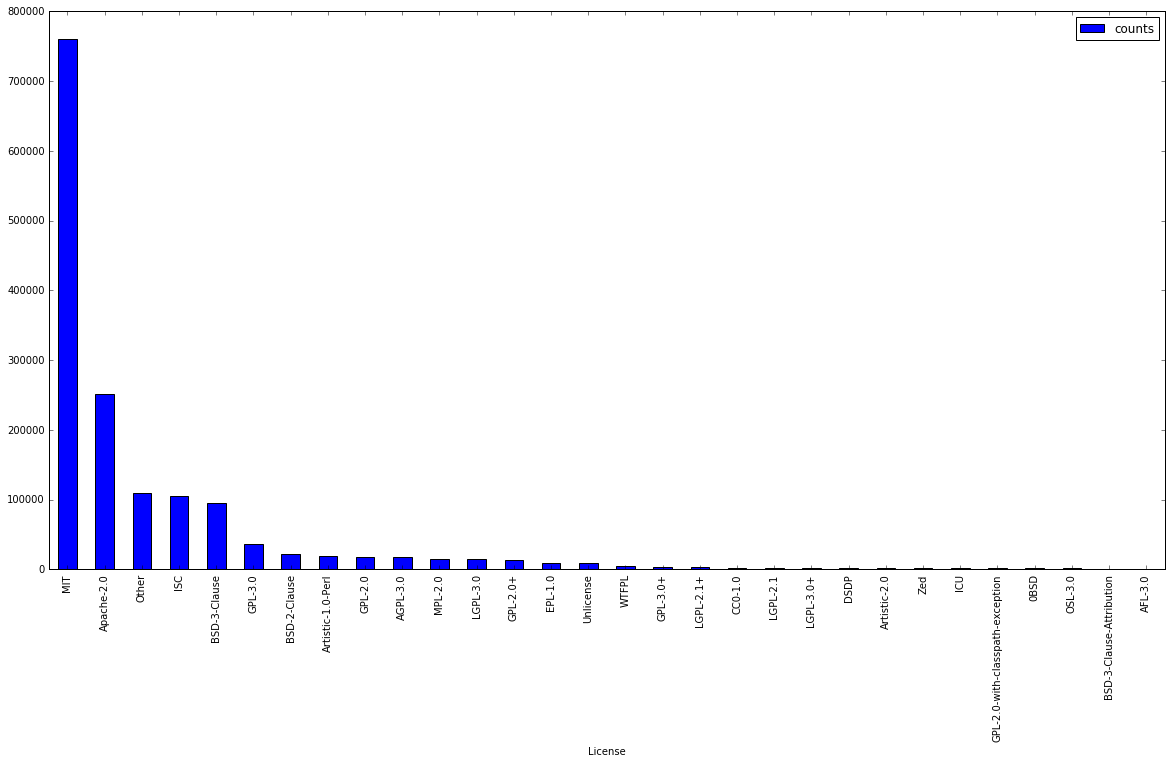

In [21]:
for x in license_counts.most_common(10):
    print "%s: %d" % x

df_license_counts = pd.DataFrame.from_dict([{"License": x[0], "counts": x[1]} for x in license_counts.most_common(30)])
df_license_counts = df_license_counts.set_index("License")
# df_license_counts.sort_values("counts").plot.bar()
df_license_counts.plot.bar()


In [12]:
df_dependencies = pd.read_csv("dependencies-1.0.0-2017-06-15.csv")


In [13]:
arr = df_dependencies["Dependency Kind"].unique()
deps_unique = set(map(lambda x: x.strip(), arr))
deps_type_count = {}

for x in deps_unique:
    deps_type_count[x] = df_dependencies[df_dependencies["Dependency Kind"].str.strip() == x]["Dependency Kind"].count()


entries = map(lambda x: {"dep_type": x[0], "count":x[1]}, deps_type_count.items())
df_deps_type = pd.DataFrame.from_dict(entries)

df_deps_type.sort_values("count", ascending=False).head(10)

df_new = df_deps_type.set_index("dep_type")
df_new.sort_values("count").plot.bar()


                                 count
dep_type                              
runtime                       25591298
Development                   23107381
test                            887464
compile                         449863
develop                         286333
provided                        237896
build                           215517
configure                       163825
imports                         110296
normal                           63199
depends                          58146
suggests                         37539
dev                              20410
system                            9712
optional                           261
enhances                           259
x_benchmarks                       191
Optional                            80
RUNTIME                             70
import                              57
test-compile                        36
caching                             30
COMPILE                             28
tests                    

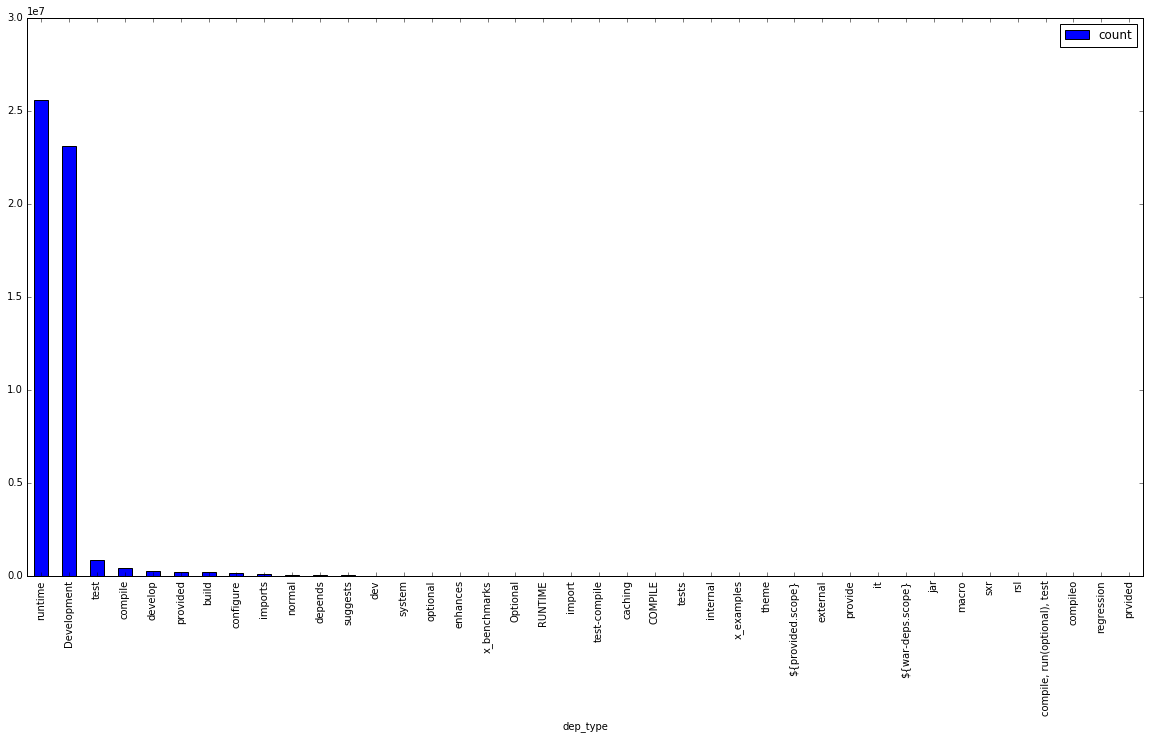

In [23]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
df_deptype_sorted = df_new.sort_values("count", ascending=False)
print df_deptype_sorted
df_deptype_sorted.plot.bar()


In [22]:
df_dependencies.head()

,ID,Platform,Project Name,Project ID,Version Number,Version ID,Dependency Name,Dependency Platform,Dependency Kind,Optional Dependency,Dependency Requirements,Dependency Project ID
0,8737,Dub,a4g,197,0.1.0,2,a4g:client,Dub,runtime,NaN,*,NaN
1,8738,Dub,a4g,197,0.1.0,2,a4g:server,Dub,runtime,NaN,*,NaN
2,8743,Dub,ae,199,1.0.0,6,openssl,Dub,runtime,NaN,>=1.1.3+1.0.1g,493.0
3,8744,Dub,ae,199,1.0.1,7,openssl,Dub,runtime,NaN,>=1.1.3+1.0.1g,493.0
4,8752,Dub,anchovy,203,0.2.4,21,anchovy:core,Dub,runtime,NaN,~master,NaN


In [24]:
df_projects.head()

,ID,Platform,Name,Created Timestamp,Updated Timestamp,Description,Keywords,Homepage URL,Licenses,Repository URL,...,SourceRank,Latest Release Publish Timestamp,Latest Release Number,Package Manager ID,Dependent Projects Count,Language,Status,Last synced Timestamp,Dependent Repositories Count,Repository ID
0,1,Alcatraz,21st digital Templates,2015-01-11 23:56:18 UTC,2017-06-14 01:03:14 UTC,"A starting point for stripped down, structured...",NaN,https://github.com/21stdigital/Xcode-Templates,NaN,https://github.com/21stdigital/Xcode-Templates,...,2,2017-06-14 01:03:05 UTC,NaN,NaN,0,Objective-C,NaN,2017-06-14 01:03:10 UTC,0,3945.0
1,2,Alcatraz,ACCodeSnippetRepository,2015-01-11 23:56:18 UTC,2017-06-14 01:03:10 UTC,Synchronize code snippets with a git repository.,NaN,https://github.com/acoomans/ACCodeSnippetRepos...,MIT,https://github.com/acoomans/ACCodeSnippetRepos...,...,11,2014-03-13 18:40:38 UTC,0.0.4,NaN,0,Objective-C,NaN,2017-06-14 01:03:07 UTC,0,3943.0
2,3,Alcatraz,AdjustFontSize,2015-01-11 23:56:18 UTC,2017-06-14 01:03:24 UTC,Adjust font size with ⌃ + / ⌃ -,NaN,https://github.com/zats/AdjustFontSize-Xcode-P...,NaN,https://github.com/zats/AdjustFontSize-Xcode-P...,...,4,2017-06-14 01:03:12 UTC,NaN,NaN,0,Objective-C,NaN,2017-06-14 01:03:19 UTC,0,3944.0
3,4,Alcatraz,AeroGear Template,2015-01-11 23:56:18 UTC,2017-06-14 01:03:13 UTC,"Setup for your AeroGear projects, based on Coc...",NaN,https://github.com/aerogear/aerogear-ios-xcode...,NaN,https://github.com/aerogear/aerogear-ios-xcode...,...,8,2014-10-16 07:53:22 UTC,1.6.2,NaN,0,Objective-C,NaN,2017-06-14 01:03:09 UTC,0,3946.0
4,5,Alcatraz,Aerolitec Templates,2015-01-11 23:56:18 UTC,2017-06-14 01:03:24 UTC,File templates for Aerolitec Coding Standard,NaN,https://github.com/Aerolitec/aerolitec-templates,NaN,https://github.com/Aerolitec/aerolitec-templates,...,1,2017-06-14 01:03:11 UTC,NaN,NaN,0,Objective-C,NaN,2017-06-14 01:03:19 UTC,0,3947.0


In [15]:
keywords_count = Counter()
t = df_projects.Keywords.dropna().str.split(",").apply(keywords_count.update)
keywords_count.most_common(10)


[('react', 17414),
 ('api', 15742),
 ('test', 15457),
 ('library', 14362),
 ('plugin', 13985),
 ('javascript', 13091),
 ('framework', 12650),
 ('jquery', 11957),
 ('angular', 11858),
 ('css', 11735)]

react: 17414
api: 15742
test: 15457
library: 14362
plugin: 13985
javascript: 13091
framework: 12650
jquery: 11957
angular: 11858
css: 11735
laravel: 10945
json: 8701
npm: 8274
widget: 7919
node: 7917
cli: 7618
php: 7375
yii2: 7345
documentation: 7002
html: 6752
yeoman-generator: 6713
commerce: 6685
gruntplugin: 6592
react-component: 6581
image: 6576
web: 6375
epic: 6361
http: 6351
orkiv: 6346
bsd3: 6166


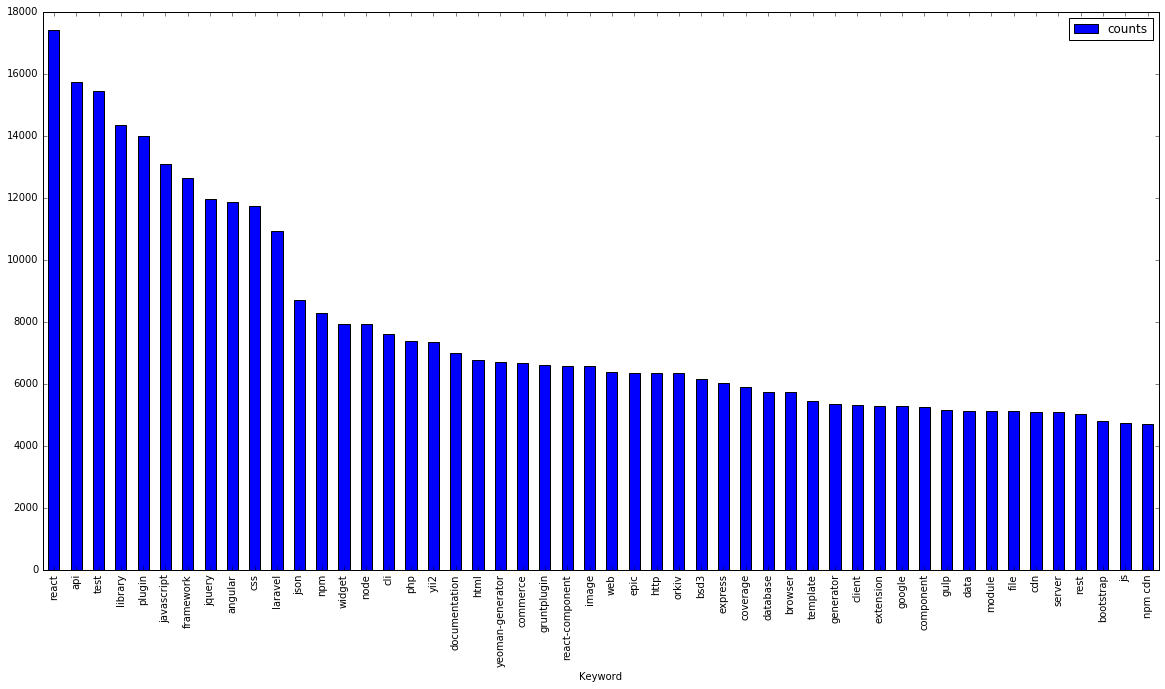

In [25]:
for x in keywords_count.most_common(30):
    print "%s: %d" % x


df_keywords_count = pd.DataFrame.from_dict([{"Keyword": x[0], "counts": x[1]} for x in keywords_count.most_common(50)])
df_keywords_count = df_keywords_count.set_index("Keyword")
# df_license_counts.sort_values("counts").plot.bar()
df_keywords_count.plot.bar()


In [26]:
print len(keywords_count)

for x in keywords_count.most_common(50):
    print x

369598
('react', 17414)
('api', 15742)
('test', 15457)
('library', 14362)
('plugin', 13985)
('javascript', 13091)
('framework', 12650)
('jquery', 11957)
('angular', 11858)
('css', 11735)
('laravel', 10945)
('json', 8701)
('npm', 8274)
('widget', 7919)
('node', 7917)
('cli', 7618)
('php', 7375)
('yii2', 7345)
('documentation', 7002)
('html', 6752)
('yeoman-generator', 6713)
('commerce', 6685)
('gruntplugin', 6592)
('react-component', 6581)
('image', 6576)
('web', 6375)
('epic', 6361)
('http', 6351)
('orkiv', 6346)
('bsd3', 6166)
('express', 6037)
('coverage', 5893)
('database', 5746)
('browser', 5726)
('template', 5454)
('generator', 5340)
('client', 5330)
('extension', 5292)
('google', 5285)
('component', 5258)
('gulp', 5141)
('data', 5136)
('module', 5130)
('file', 5110)
('cdn', 5100)
('server', 5090)
('rest', 5010)
('bootstrap', 4804)
('js', 4749)
('npm cdn', 4706)


counts    500
dtype: int64


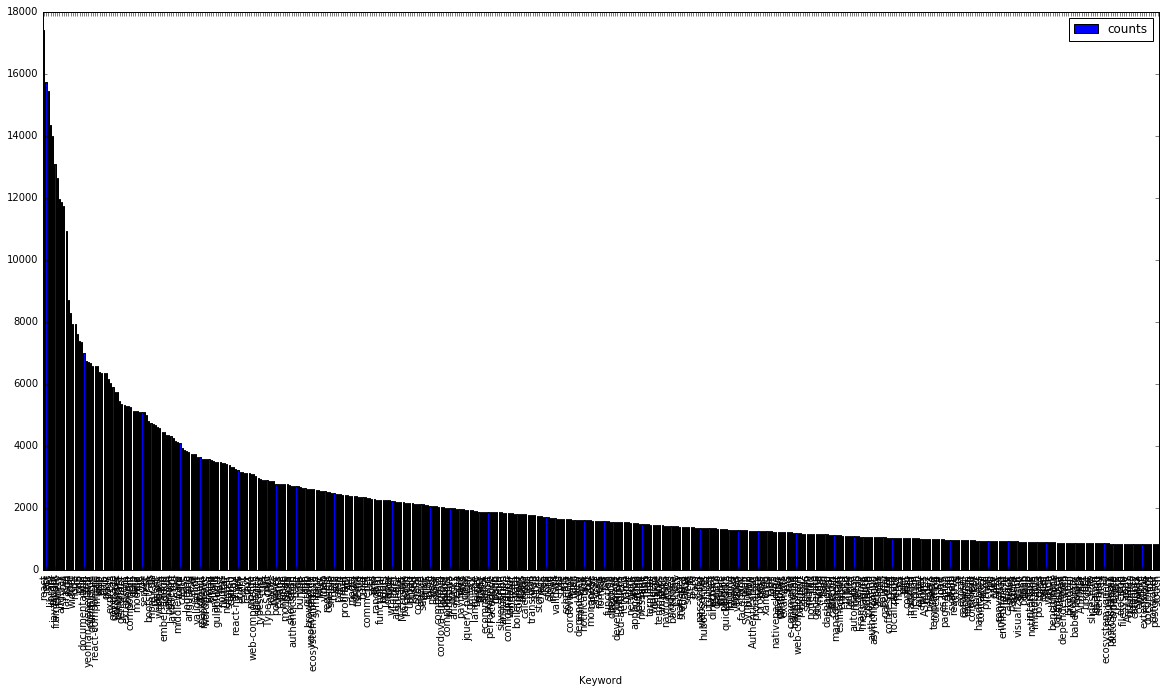

In [18]:
df_keywords_count_all = pd.DataFrame.from_dict([{"Keyword": x[0], "counts": x[1]} for x in keywords_count.most_common(500)])
df_keywords_count_all = df_keywords_count_all.set_index("Keyword")
print df_keywords_count_all.count()
df_keywords_count_all.plot.bar()
# keywords_count